<a href="https://colab.research.google.com/github/UCREL/Session1_Visualisation_and_Summarisation/blob/main/NoteBooks/1_Visualisation_SpaCy_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation with spaCy Tutorial

This notebook demonstrates how to use spaCy for text visualisation, focusing on named entity recognition and syntactic dependency parsing.

# Step 1: Install and Import Libraries

In this step, we will install the required libraries and import them. We will primarily use spaCy for text processing and visualisation.

In Natural Language Processing (NLP), preparing the text data correctly is crucial for effective analysis and model training. This part focuses on the initial steps of text preprocessing which involve cleaning the input text.



---

> Let's execute it to see the results.
---

In [1]:
#installing spaCy
#https://spacy.io/usage
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm
!pip install kaleido
!pip install tabulate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 9.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


### Creating a Directory for Plots

In this section, we create a new directory named `plots` to organize and store our generated plots. This ensures that all visualizations are saved in a dedicated location, making it easier to manage and access them.

**Command Explanation**:
```python
!mkdir plots
```
- **`!`**: The exclamation mark is used in Jupyter and Colab notebooks to execute system shell commands directly from a code cell. It allows us to run terminal commands within the notebook environment.
- **`mkdir`**: This stands for "make directory." It is a command used in Unix-based systems (such as Linux and macOS) to create a new directory.
- **`plots`**: This is the name of the new directory we are creating. Once executed, a folder named `plots` will be created in the current working directory of the notebook.

**Purpose**:
- Organizing Output: By storing all plot files in a specific folder, we keep the workspace tidy and make it easier to locate and manage visualizations.
- Preparation for Saving: Before generating and saving plots, ensuring the target directory exists prevents errors related to missing directories.








---

>  Let's execute it to see the results.
---

In [2]:
!mkdir plots

mkdir: plots: File exists


### Load SpaCy Models and Tokenizer Setup
setting up the SpaCy natural language processing (NLP) library to perform various linguistic tasks such as tokenization, parsing, and named entity recognition.

1. **Importing Modules**:
   Before using SpaCy's functionalities, you first need to import the necessary components. The `Tokenizer` class is specifically imported to handle the tokenization process.

   ```python
   from spacy.tokenizer import Tokenizer
   import spacy
   ```

2. **Loading the SpaCy Model**:
   The SpaCy model for English (`en_core_web_sm`) is loaded using `spacy.load()`. This model includes data and algorithms necessary for language processing tasks. If you're processing text in another language, you would load the corresponding model (e.g., `de_core_news_sm` for German).

   ```python
   nlp = spacy.load("en_core_web_sm")  # loading language model
   ```

   This model loading step is crucial because it prepares SpaCy with the tools and data needed for processing English text, including pre-trained weights for understanding the structure and meaning of the language.

3. **Alternative Model Importing Method**:
   The commented-out lines provide an alternative way to load the SpaCy model. This method involves directly importing the model package and calling the `load()` method on it, which is useful if you want to avoid using the string name and prefer a more explicit import statement.

   ```python
   #import en_core_web_sm
   #nlp = en_core_web_sm.load()
   ```

4. **Tokenizer Initialization**:
   After loading the language model, a `Tokenizer` object is created using the vocabulary from the loaded `nlp` object. This tokenizer is configured to split text into tokens using the vocabulary of the English model.

   ```python
   tokenizer = Tokenizer(nlp.vocab)  # Create a blank Tokenizer with just the English vocab
   ```


### Note on Errors:
   If you encounter a `ModuleNotFoundError`, it typically means that the SpaCy language model isn't installed on your system. The initial comment in the code snippet guides you to download the necessary language model using installation commands provided in a prior cell.







---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [3]:
# Load the SpaCy English model. This model will be used for tokenisation, parsing, and named entity recognition.
# SpaCy Tokenizer Construction
# If running the following returns with ModuleNotFoundError then you need to download the language needed (see cell above)
from spacy.tokenizer import Tokenizer

import spacy

nlp = spacy.load("en_core_web_sm") #loading language model. Use de_core_news_sm for German for e.g..

#otherwise you can use import of spacy.load()
    #import en_core_web_sm
    #nlp = en_core_web_sm.load()

# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

# Step 2: Load and Preprocess Data

We will load the text data that will be used for visualisation. For this tutorial, we will use a small sample text.

### Define a Sentence






---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [4]:
sentence = "Today is July 24th, 2024, and Mo and Nouran are showing us how to visualise text online at Lancaster University. This is part of a UCREL NLP Summer School at Lancaster    University, which will   run at    InfoLab21 at Lancaster    from July 24th to 26th. There will be speakers and NLP tutorials as well as breakfast, lunch, and dinners. Attendees will have the opportunity to learn from experts in the field and network with peers."

### Tokenisation with Punctuation Considerations

1. **tokenisation**: The primary operation is the tokenisation of the `sentence`. tokenisation is a process that splits the text into individual elements or "tokens," which are typically words or significant punctuation marks. This is crucial for many NLP tasks as it converts unstructured text into a structured form that algorithms can work with.

   ```python
   tokens = tokenizer(sentence)  # Tokenise the cleaned sentence
   ```

   Here, it's important to note that the tokenisation is sensitive to punctuation. This means punctuation like the Arabic comma '،' is recognised and treated as a separate token, which can be vital for language-specific processing.

2. **Token Count**: After tokenisation, the code calculates and prints the number of tokens in the sentence. This metric is useful for understanding the size of the data being processed, which can impact both performance and the approach to further analysis.

   ```python
   print('Number of words: ', len(tokens))
   ```

3. **Display Tokens**: The last part involves printing out each token. This is helpful for debugging and verifying that the tokenisation process has correctly identified and separated each word and relevant punctuation as intended.

   ```python
   print('\n>>>>>>>Tokens<<<<<<<:')
   for t in tokens:
       print(t)
   ```

This setup not only prepares the text for more complex processing but also ensures that specific linguistic elements, such as punctuation in different languages, are appropriately recognized and handled, which is critical for maintaining the semantic integrity of the text in NLP applications.






---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [5]:
tokens = tokenizer(sentence) #' '.join(sentence.split()) needed to avoid excess whitespaces.
# notice that a punctuation such as ، (a comma in Arabic), is considered a token!
print('Number of words: ',len(tokens))
print('\n>>>>>>>Tokens<<<<<<<:')
for t in tokens:
    print(t)

Number of words:  78

>>>>>>>Tokens<<<<<<<:
Today
is
July
24th,
2024,
and
Mo
and
Nouran
are
showing
us
how
to
visualise
text
online
at
Lancaster
University.
This
is
part
of
a
UCREL
NLP
Summer
School
at
Lancaster
   
University,
which
will
  
run
at
   
InfoLab21
at
Lancaster
   
from
July
24th
to
26th.
There
will
be
speakers
and
NLP
tutorials
as
well
as
breakfast,
lunch,
and
dinners.
Attendees
will
have
the
opportunity
to
learn
from
experts
in
the
field
and
network
with
peers.


The output demonstrates the list of tokens after preprocessing the text. Note the removal of extra spaces and punctuation, which simplifies further analysis by focusing only on meaningful words.

### What Next??


1. **Whitespace Normalization**: The first step reduces any consecutive spaces in the text to a single space. This helps in standardizing the text format and avoiding inconsistencies that could arise from varied spacing (such as spaces, tabs, or newlines).

   ```python
   sentence = ' '.join(sentence.split())  # remove extra white spaces
   ```

2. **Punctuation Removal**: The second line removes all punctuation from the text using a regular expression. This is useful in many text processing tasks where punctuation does not add value, such as tokenisation or when building a bag-of-words model.

   ```python
   sentence = re.sub(r'[^\w\s]', '', sentence)  # use regex to remove punctuations
   ```

3. **tokenisation**: After cleaning the text, the next step is tokenisation, where the cleaned sentence is split into individual elements or "tokens". tokenisation is fundamental in NLP for breaking down text into manageable pieces for further analysis.

   ```python
   tokens = tokenizer(sentence)  # we call the tokenizer again over the cleaned sentence
   ```

4. **Output Display**: Finally, the number of tokens is printed followed by the tokens themselves. This output helps in verifying the effectiveness of the preprocessing steps.

   ```python
   print('Number of words: ', len(tokens))
   print('\n>>>>>>>Tokens<<<<<<<:')
   for t in tokens:
       print(t)
   ```




---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [6]:
import re
sentence = ' '.join(sentence.split())#remove extra white spaces
sentence = re.sub(r'[^\w\s]','',sentence)#use regex to remove puncatuations

tokens = tokenizer(sentence) #we call the tokenizer again over the cleaned sentence

print('Numer of words: ',len(tokens))
print('\n>>>>>>>Tokens<<<<<<<:')
for t in tokens:
    print(t)

Numer of words:  74

>>>>>>>Tokens<<<<<<<:
Today
is
July
24th
2024
and
Mo
and
Nouran
are
showing
us
how
to
visualise
text
online
at
Lancaster
University
This
is
part
of
a
UCREL
NLP
Summer
School
at
Lancaster
University
which
will
run
at
InfoLab21
at
Lancaster
from
July
24th
to
26th
There
will
be
speakers
and
NLP
tutorials
as
well
as
breakfast
lunch
and
dinners
Attendees
will
have
the
opportunity
to
learn
from
experts
in
the
field
and
network
with
peers


---

## Simplifying preprocessing with SpaCy

Emphasize the ease of use and privilege the capabilities of SpaCy, a leading library in Natural Language Processing (NLP). SpaCy offers efficient, robust tools designed to streamline complex linguistic tasks.


---

### Function `tokenise_sentence`

This function, `tokenise_sentence`, is designed to process a given sentence through the SpaCy Natural Language Processing (NLP) framework to extract and return tokens. It is designed to provide a clean, whitespace-free list of tokens from a sentence using SpaCy's robust NLP capabilities. This function can be extremely useful in preprocessing text data for deeper NLP tasks where precise token-level analysis is required.

Below is a breakdown of its components and functionality:

1. **Function Definition**:
   ```python
   def tokenise_sentence(sentence):
   ```
   The function `tokenise_sentence` takes one parameter, `sentence`, which is expected to be a string representing the sentence to be tokenised.

2. **Processing the Sentence**:
   ```python
   doc = nlp(sentence)
   ```
   Inside the function, the input `sentence` is processed by the `nlp` object. This object, which should have been previously loaded with a language model (as discussed in the previous explanation), applies various NLP tasks such as tokenisation, parsing, and named entity recognition. The result is a `Doc` object that contains a sequence of token objects.

3. **Token Extraction**:
   ```python
   tokens = [token for token in doc if token.text.strip()]  # Keep the tokens as spaCy objects
   ```
   This line comprehensively filters through all tokens generated by the `nlp` object. It uses a list comprehension to extract each token, ensuring each token's text is non-empty (after stripping any surrounding whitespace). This step is crucial as it removes any tokens that might only consist of whitespace, which are generally not useful for further analysis.

4. **Return Value**:
   ```python
   return tokens
   ```
   The function returns a list of tokens. These tokens are still in their original SpaCy `Token` object form, which allows subsequent processing steps to leverage other SpaCy functionalities directly linked to each token (like lemmas, part-of-speech tags, and syntactic dependencies).







---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [7]:
def tokenise_sentence(sentence):
    doc = nlp(sentence)
    tokens = [token for token in doc if token.text.strip()] # Keep the tokens as spaCy objects
    return tokens

Here, efficiently tokenises a sentence and displays the resulting tokens and their count, leveraging the functionality encapsulated within the `tokenise_sentence` function.





---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [8]:
tokens = tokenise_sentence(sentence)
print('Number of words:', len(tokens))
print('\n>>>>>>> Tokens <<<<<<<:')
for t in tokens:
    print(t)

Number of words: 74

>>>>>>> Tokens <<<<<<<:
Today
is
July
24th
2024
and
Mo
and
Nouran
are
showing
us
how
to
visualise
text
online
at
Lancaster
University
This
is
part
of
a
UCREL
NLP
Summer
School
at
Lancaster
University
which
will
run
at
InfoLab21
at
Lancaster
from
July
24th
to
26th
There
will
be
speakers
and
NLP
tutorials
as
well
as
breakfast
lunch
and
dinners
Attendees
will
have
the
opportunity
to
learn
from
experts
in
the
field
and
network
with
peers


---
# Do you think of Better visualisation?
---




---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [9]:
from tabulate import tabulate
# Prepare data for tabulation
table_data = [[i + 1, token] for i, token in enumerate(tokens)]
table_headers = ["Token Index", "Token"]

# Display the table using tabulate
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))


+-------------+-------------+
| Token Index |    Token    |
+-------------+-------------+
|      1      |    Today    |
|      2      |     is      |
|      3      |    July     |
|      4      |    24th     |
|      5      |    2024     |
|      6      |     and     |
|      7      |     Mo      |
|      8      |     and     |
|      9      |   Nouran    |
|     10      |     are     |
|     11      |   showing   |
|     12      |     us      |
|     13      |     how     |
|     14      |     to      |
|     15      |  visualise  |
|     16      |    text     |
|     17      |   online    |
|     18      |     at      |
|     19      |  Lancaster  |
|     20      | University  |
|     21      |    This     |
|     22      |     is      |
|     23      |    part     |
|     24      |     of      |
|     25      |      a      |
|     26      |    UCREL    |
|     27      |     NLP     |
|     28      |   Summer    |
|     29      |   School    |
|     30      |     at      |
|     31  

---
What about POS Tags?
---
Displaying the part-of-speech (POS) tags for each token using SpaCy enhancing the understanding of the sentence structure by revealing the grammatical role of each word.




---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [10]:
tokens = tokenise_sentence(sentence)
print('Number of words:', len(tokens))
print('\n>>>>>>> Tokens and POS Tags <<<<<<<:')
for t in tokens:
    print(f'{t.text} ({t.pos_})')


Number of words: 74

>>>>>>> Tokens and POS Tags <<<<<<<:
Today (NOUN)
is (AUX)
July (PROPN)
24th (NOUN)
2024 (NUM)
and (CCONJ)
Mo (PROPN)
and (CCONJ)
Nouran (PROPN)
are (AUX)
showing (VERB)
us (PRON)
how (SCONJ)
to (PART)
visualise (VERB)
text (NOUN)
online (ADV)
at (ADP)
Lancaster (PROPN)
University (PROPN)
This (PRON)
is (AUX)
part (NOUN)
of (ADP)
a (DET)
UCREL (PROPN)
NLP (PROPN)
Summer (PROPN)
School (PROPN)
at (ADP)
Lancaster (PROPN)
University (PROPN)
which (PRON)
will (AUX)
run (VERB)
at (ADP)
InfoLab21 (NOUN)
at (ADP)
Lancaster (PROPN)
from (ADP)
July (PROPN)
24th (NOUN)
to (ADP)
26th (NOUN)
There (PRON)
will (AUX)
be (AUX)
speakers (NOUN)
and (CCONJ)
NLP (NOUN)
tutorials (NOUN)
as (ADV)
well (ADV)
as (ADP)
breakfast (NOUN)
lunch (NOUN)
and (CCONJ)
dinners (NOUN)
Attendees (PROPN)
will (AUX)
have (VERB)
the (DET)
opportunity (NOUN)
to (PART)
learn (VERB)
from (ADP)
experts (NOUN)
in (ADP)
the (DET)
field (NOUN)
and (CCONJ)
network (NOUN)
with (ADP)
peers (NOUN)





---

> Better Visualisation, Let's execute it to see the results.
---

In [11]:
from tabulate import tabulate

# Prepare data for tabulation
table_data = [[i + 1, token.text, token.pos_] for i, token in enumerate(tokens)]
table_headers = ["Index", "Token", "POS"]

# Display the table using tabulate
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))


+-------+-------------+-------+
| Index |    Token    |  POS  |
+-------+-------------+-------+
|   1   |    Today    | NOUN  |
|   2   |     is      |  AUX  |
|   3   |    July     | PROPN |
|   4   |    24th     | NOUN  |
|   5   |    2024     |  NUM  |
|   6   |     and     | CCONJ |
|   7   |     Mo      | PROPN |
|   8   |     and     | CCONJ |
|   9   |   Nouran    | PROPN |
|  10   |     are     |  AUX  |
|  11   |   showing   | VERB  |
|  12   |     us      | PRON  |
|  13   |     how     | SCONJ |
|  14   |     to      | PART  |
|  15   |  visualise  | VERB  |
|  16   |    text     | NOUN  |
|  17   |   online    |  ADV  |
|  18   |     at      |  ADP  |
|  19   |  Lancaster  | PROPN |
|  20   | University  | PROPN |
|  21   |    This     | PRON  |
|  22   |     is      |  AUX  |
|  23   |    part     | NOUN  |
|  24   |     of      |  ADP  |
|  25   |      a      |  DET  |
|  26   |    UCREL    | PROPN |
|  27   |     NLP     | PROPN |
|  28   |   Summer    | PROPN |
|  29   

### Plot Visualisation

1. **Data Preparation**:
   - The `token_texts_with_pos` list now includes tuples of `(token.text, token.pos_)` to capture both the text of the token and its POS tag.
   - The `Counter` is used on this modified list to count occurrences of each unique `(text, POS)` combination.

2. **DataFrame Conversion**:
   - The DataFrame `token_df` is created from the `Counter` items, initially containing a single column 'Token_POS' that combines both token text and POS.
   - This column is split into two separate columns ('Token' and 'POS') using `pd.DataFrame()`, which enables easier manipulation and plotting.

3. **Plotting**:
   - The `px.bar` function from Plotly is used to create a bar chart. The `x` argument is set to 'Token' for the x-axis, `y` to 'Frequency' for the y-axis, and `color` to 'POS' to differentiate bars by POS tags in the plot.




---

> Better Visualisation, Let's execute it to see the results.
---

In [44]:
import plotly.express as px
import pandas as pd
from collections import Counter

# function to visualize token frequency with POS using Plotly
def visualize_token_frequency_plotly(tokens):
    # Extract token texts and POS tags for counting and plotting
    token_texts_with_pos = [(token.text, token.pos_) for token in tokens]

    # Count token frequencies with POS tags
    token_counts_with_pos = Counter(token_texts_with_pos)  # Count based on token texts and POS tags

    # Convert to DataFrame for Plotly
    token_df = pd.DataFrame(list(token_counts_with_pos.items()), columns=['Token_POS', 'Frequency'])
    token_df[['Token', 'POS']] = pd.DataFrame(token_df['Token_POS'].tolist(), index=token_df.index)
    token_df = token_df.drop('Token_POS', axis=1).sort_values(by='Frequency', ascending=False)
    token_df['POS'] = token_df['POS'].apply(lambda x: 'NOUN' if x == "PROPN" else x)
    token_df['POS'] = token_df['POS'].apply(lambda x: 'CONJ' if x == "SCONJ" or x == "CCONJ" else x)
    token_df['POS'] = token_df['POS'].apply(lambda x: 'VERB' if x == "AUX" else x)

    # Plot the token frequencies with POS tags
    fig = px.bar(token_df, x='Token', y='Frequency', color='POS', title='Token Frequency Distribution with POS Tags')
    fig.update_layout(xaxis_tickangle=-90)
    fig.show()
    ## Save the graph
    plotly_filename = f'./plots/plotly_Spacy_Frequency.jpeg'
    fig.write_image(plotly_filename, scale=2)
    fig.write_html(f'./plots/plotly_Spacy_Frequency.html')


# usage
tokens = tokenise_sentence("Today is July 24th, 2024, and Mo and Nouran are showing us how to visualise text online at Lancaster University. This is part of a UCREL NLP Summer School at Lancaster    University, which will   run at    InfoLab21 at Lancaster    from July 24th to 26th. There will be speakers and NLP tutorials as well as breakfast, lunch, and dinners. Attendees will have the opportunity to learn from experts in the field and network with peers.")
print('Number of words:', len(tokens))

visualize_token_frequency_plotly(tokens)

Number of words: 83


Note: **Plotly** is not viewed on saved **Notebooks**




---

> Let's execute it to see the results.
---

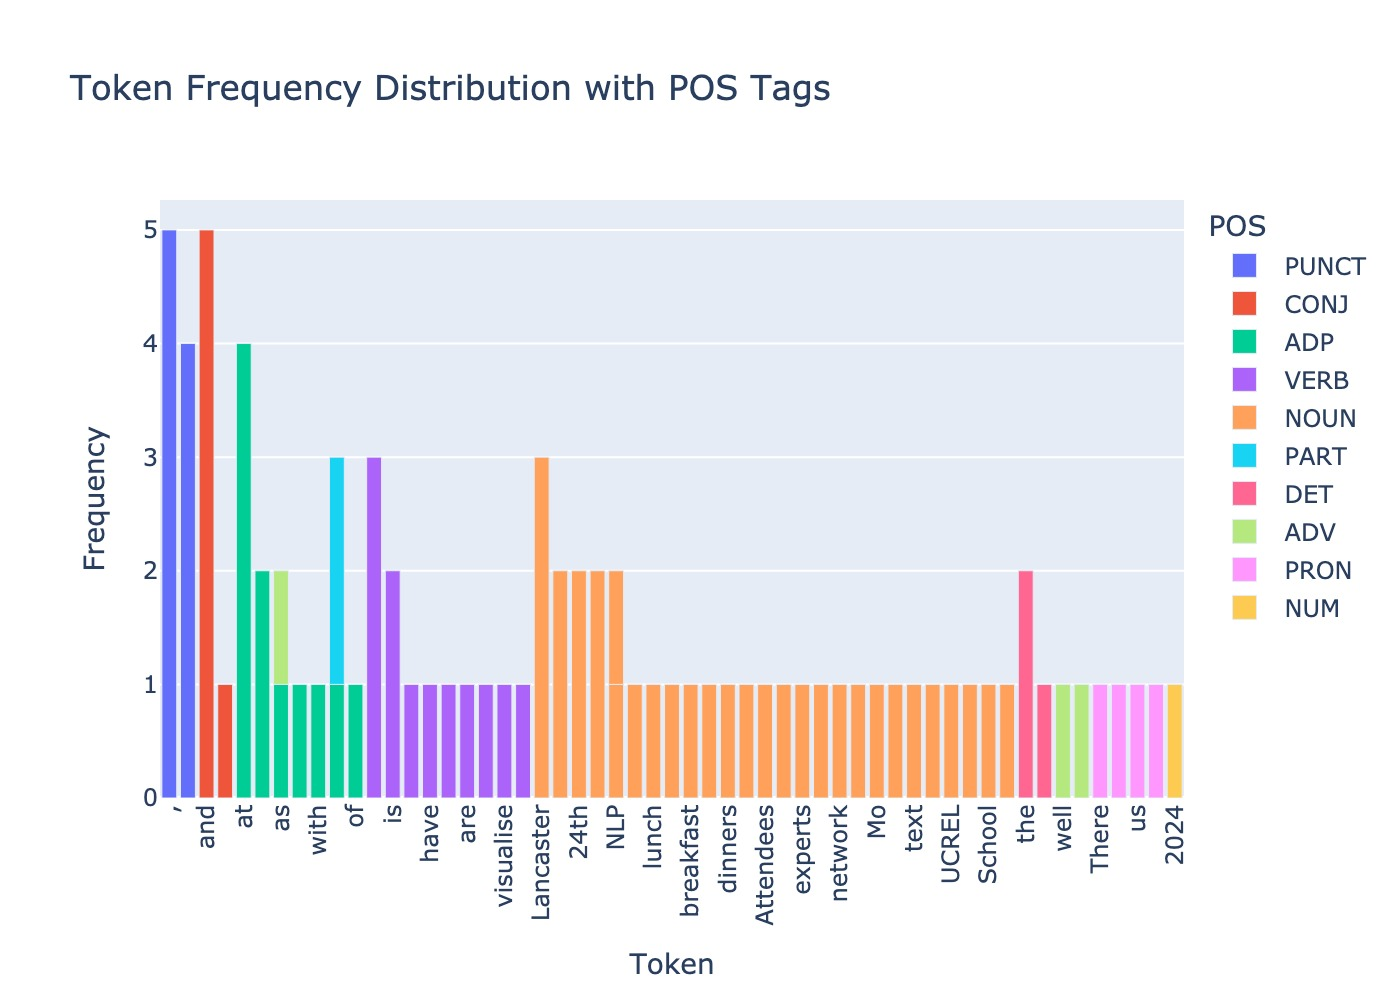

In [45]:
from IPython.display import Image, display
plotly_filename = f'./plots/plotly_Spacy_Frequency.jpeg'
# Display the image in the notebook
display(Image(plotly_filename))

# What about stop-words?

- Stop words are typically common words in a language that are filtered out in text processing to focus on more meaningful words for analysis.

- We import the set of English language stop words from SpaCy's language-specific stop word list. SpaCy provides a comprehensive collection of stop words for various languages, which can be accessed and utilized as needed for different linguistic datasets. For a complete list of languages and their stop words, refer to the [official SpaCy documentation](https://spacy.io/usage/models).

#### Importing SpaCy's Stop Words
```python
from spacy.lang.en.stop_words import STOP_WORDS
```

#### Conversion to DataFrame for Better Visualization
```python
stop_words_df = pd.DataFrame(list(STOP_WORDS), columns=['Stop Word'])
```
- The stop words are stored in a set, a Python data structure that supports membership tests, allowing for fast checking of whether an item is present in the set. Here, we convert this set into a pandas DataFrame to facilitate easier viewing and manipulation. Each stop word is listed in a single column, making it simple to visually scan through the words.

#### Displaying the DataFrame
```python
stop_words_df
```
- Finally, displaying the DataFrame directly in the notebook allows for a quick review of all the stop words.





---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [19]:
#SpaCy's English language stop words (for other languages see: https://spacy.io/usage/models)
from spacy.lang.en.stop_words import STOP_WORDS

# Convert stop words set to a DataFrame
stop_words_df = pd.DataFrame(list(STOP_WORDS), columns=['Stop Word'])

# Display the DataFrame
stop_words_df

,Stop Word
0,where
1,i
2,per
3,unless
4,may
...,...
321,up
322,do
323,whom
324,more


#Let's get tokens ignoring stop-words and punctuations (remember we used regex to remove puncations).

### Filtering Tokens: Ignoring Stop Words and Punctuations

Refining the token list by removing stop words and punctuation, which are generally less useful for many Natural Language Processing (NLP) tasks.

Filtering out these common yet uninformative elements, we focus the analysis on content-rich words that are more likely to contribute meaningful insights into the text's context or sentiment.

```python
tokens_no_stopwords = [token.text for token in tokens if token.is_stop != True and token.is_punct != True]
```

- **List Comprehension**: This is used to iterate over the list `tokens`, which contains token objects processed by SpaCy.
- **Condition Check**: Each token is checked to ensure it is neither a stop word (`token.is_stop != True`) nor a punctuation mark (`token.is_punct != True`). These attributes are built into SpaCy token objects and provide a straightforward way to filter out unwanted tokens.
- **Result**: The output is a list called `tokens_no_stopwords`, which contains only the textual part (`token.text`) of each token that is not a stop word or punctuation.





---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [20]:
tokens_no_stopwords = [token.text for token in tokens if token.is_stop != True and token.is_punct != True]

In [21]:
#Notice that the puncation disappears in the 2nd output as well as the new stop-word 'text'
print('With stop-words\n',*tokens, '>>>>>>',len(tokens), 'words.')
print('Without stop-words\n',*tokens_no_stopwords, '>>>>>>', len(tokens_no_stopwords), 'words.')

With stop-words
 Today is July 24th , 2024 , and Mo and Nouran are showing us how to visualise text online at Lancaster University . This is part of a UCREL NLP Summer School at Lancaster University , which will run at InfoLab21 at Lancaster from July 24th to 26th . There will be speakers and NLP tutorials as well as breakfast , lunch , and dinners . Attendees will have the opportunity to learn from experts in the field and network with peers . >>>>>> 83 words.
Without stop-words
 Today July 24th 2024 Mo Nouran showing visualise text online Lancaster University UCREL NLP Summer School Lancaster University run InfoLab21 Lancaster July 24th 26th speakers NLP tutorials breakfast lunch dinners Attendees opportunity learn experts field network peers >>>>>> 37 words.


## What if we want to add/remove to/from the default stop-words list?


1. **Adding a Stop Word**:
   ```python
   nlp.Defaults.stop_words.add("text")
   ```
   - Assume 'text' becomes a frequent but uninformative word in our text corpus. To treat it as a stop word, we add it to the default stop words list using the `add` method. This operation modifies the set of stop words for the `nlp` object, reflecting in all NLP tasks using this model.

2. **Removing a Stop Word**:
   ```python
   nlp.Defaults.stop_words.remove("word_to_be_removed")
   ```
   - If a word is deemed necessary for analysis or was added by mistake, it can be removed from the stop words list using the `remove` method. Replace `"word_to_be_removed"` with the actual word you wish to remove.

3. **Display Updated List**:
   ```python
   stop_words_df = pd.DataFrame(list(nlp.Defaults.stop_words), columns=['Stop Word'])
   stop_words_df
   ```


---




---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [22]:
#what if we want to add/remove to/from the default stop-words list?
#assume the word 'text' is very frequent in our corpus to an extent that it becomes a stop-word
#to add 'text' to the stop words list:
nlp.Defaults.stop_words.add("text")

After modifications, the updated list of stop words is converted into a pandas DataFrame to make it easy to view and verify the changes. This DataFrame displays all current stop words, including any that were added or removed.

In [23]:
#print the list, notice 'text' is now an entry
#to remove a word from the list use: nlp.Defaults.stop_words.remove("word_to_be_removed")
# Convert stop words set to a DataFrame
stop_words_df = pd.DataFrame(list(STOP_WORDS), columns=['Stop Word'])

# Display the DataFrame
stop_words_df

,Stop Word
0,where
1,text
2,i
3,per
4,unless
...,...
322,up
323,do
324,whom
325,more




### Combining Walkthrough of Token Processing with SpaCy

This code snippet demonstrates how to load a SpaCy model, recreate a tokenizer, and filter out stop words and punctuation from a sentence using the updated tokenizer.


1. **Loading the SpaCy Model**:
   ```python
   nlp = spacy.load("en_core_web_sm")
   ```

2. **Recreating the Tokenizer**:
   ```python
   tokenizer = Tokenizer(nlp.vocab)
   ```


3. **Tokenising the Sentence**:
   ```python
   tokens = tokenizer(sentence)
   ```


4. **Filtering Non-Stop Words and Non-Punctuation Tokens**:
   ```python
   tokens_no_stopwords = [token.text for token in tokens if token.is_stop != True and token.is_punct != True]
   ```
   - This line further processes the list of tokens to filter out any that are classified as stop words (`token.is_stop != True`) or punctuation (`token.is_punct != True`). The result is a list of `tokens_no_stopwords` that contains only the meaningful content words from the original sentence.




---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [24]:
# Load the SpaCy English model. This model will be used for tokenisation, parsing, and named entity recognition.
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)#recreating the tokenizer as the previous one used the unupdated stopwords list
tokens = tokenizer(sentence)
#loop through the tokens and only consider non-stop-words and non-punctuations.
tokens_no_stopwords = [token.text for token in tokens if token.is_stop != True and token.is_punct != True]

### Extracting Linguistic Annotations with SpaCy

1. **Processing Text with SpaCy**:
   ```python
   doc = nlp(sentence)
   ```
   - The `nlp` function processes the input `sentence`, generating a `Doc` object. This object is a sequence of tokens that contains comprehensive linguistic annotations for each token. The `Doc` object encapsulates all components and data needed to understand and manipulate the textual content.

2. **Extracting Token Details**:
   ```python
   data = [(token.text, token.pos_, token.dep_) for token in doc]
   ```
   - A list comprehension is used to iterate over each token in the `Doc`. For each token, its text (`token.text`), part of speech tag (`token.pos_`), and dependency label (`token.dep_`) are extracted. These annotations are derived according to the Universal Dependencies, a widely adopted framework for consistent annotation of grammar (parts of speech, syntactic dependencies, etc.) across different human languages.

3. **Creating a DataFrame for Display**:
   ```python
   df = pd.DataFrame(data, columns=['Token', 'Part of Speech', 'Dependency'])
   ```
   - The extracted data is then converted into a pandas DataFrame.

4. **Displaying the DataFrame**:
   ```python
   print(df)
   ```
   - Finally, the DataFrame is printed, displaying a table where each row corresponds to a token and its respective linguistic annotations. This visual representation helps in understanding the syntactic structure and role of each word within the sentence.


- For those interested in further details about the specific dependency labels (like `nsubj` for nominal subject, `nummod` for numeric modifier, etc.), they can refer to the [Universal Dependencies website](https://universaldependencies.org).





---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [25]:
#Linguistic annotations (Part of speech tags and dependencies using the Universal Dependecies https://universaldependencies.org)
#This will return a Language object containing all components and data needed to process text
doc = nlp(sentence) #A Doc is a sequence of Token https://spacy.io/api/doc

# Extract token details
data = [(token.text, token.pos_, token.dep_) for token in doc]
df = pd.DataFrame(data, columns=['Token', 'Part of Speech', 'Dependency'])

# Display the DataFrame
print(df)



'''nsubj: nominal subject.\t nummod: numeric modifier ...etc. For more visit: https://universaldependencies.org'''

      Token Part of Speech Dependency
0     Today           NOUN   npadvmod
1        is            AUX       ROOT
2      July          PROPN   compound
3      24th           NOUN       attr
4      2024            NUM     nummod
..      ...            ...        ...
69    field           NOUN       pobj
70      and          CCONJ         cc
71  network           NOUN       conj
72     with            ADP       prep
73    peers           NOUN       pobj

[74 rows x 3 columns]


'nsubj: nominal subject.\t nummod: numeric modifier ...etc. For more visit: https://universaldependencies.org'

In [26]:
df

,Token,Part of Speech,Dependency
0,Today,NOUN,npadvmod
1,is,AUX,ROOT
2,July,PROPN,compound
3,24th,NOUN,attr
4,2024,NUM,nummod
...,...,...,...
69,field,NOUN,pobj
70,and,CCONJ,cc
71,network,NOUN,conj
72,with,ADP,prep


# Step 3: Visualising Syntactic Dependencies with SpaCy's displaCy

Syntactic dependency parsing helps to understand the grammatical structure of a sentence. We will visualise the syntactic dependencies of our sample text using spaCy's visualisation tools.

**Steps for Visualising Dependencies:**

1. **Loading the SpaCy Model**:
   - If not already loaded, the SpaCy English model (`en_core_web_sm`) can be loaded. This model is equipped to handle tokenisation, parsing, and named entity recognition.
   ```python
   nlp = spacy.load("en_core_web_sm")
   ```
   - The model processes the text to create a `Doc` object, which contains tokens and their linguistic annotations.

2. **Processing the Sentence**:
   - Assuming the `doc` object has been created in a previous step and contains a cleaned version of the sentence (where extra spaces and punctuations have been removed), it's ready to be visualised.
   ```python
   doc = nlp(sentence)
   ```

3. **Using displaCy for Visualisation**:
   ```python
   from spacy import displacy
   displacy.render(doc, style="dep")
   ```
   - The `displacy.render` function is called with the `doc` object and the style parameter set to `"dep"` to indicate that we want to visualise syntactic dependencies.
   - This function renders an interactive diagram of the sentence, showing how words are connected according to syntactic dependencies. Each word is linked to its dependents by arrows that are labelled with the type of syntactic relation.





---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [28]:
# Load the SpaCy English model. This model will be used for tokenisation, parsing, and named entity recognition.
# Render the text with SpaCy's displaCy visualizer to show syntactic dependencies or named entities
#Let's visualise the annotated sentence above

from spacy import displacy

#nlp = spacy.load("en_core_web_sm") #uncomment if not loaded previously
#doc = nlp(sentence)# check previous cell. That is the original cleaned sentence (only extra spaces and puncations were removed)
displacy.render(doc, style="dep")

- The output is a graphical representation of the sentence structure, where each word's role and its relationships with other words in the sentence are clearly displayed. This visualisation helps in quickly grasping complex sentence structures and is an invaluable tool for educators, students, and researchers studying computational linguistics or working with text-based data.

### Understanding Syntactic Dependencies

Syntactic dependencies describe the grammatical relationships between words in a sentence, showing how words are connected to form meaningful structures. Each token in your DataFrame has a dependency tag that indicates its relationship to another token, which serves as the head of the phrase.

- **nsubj (nominal subject)**: This label is for a noun phrase which is the syntactic subject of a clause. For example, in your data, "Today" and "Mahmoud" are subjects of their respective verbs.
- **ROOT**: The root of the sentence has no dependent words and usually is the main verb or action word in the sentence.
- **aux (auxiliary)**: This label is used for auxiliary verbs, which help express grammatical distinctions about the action/state of the main verb, like "is" showing tense.
- **conj (conjunct)**: A word that is a conjunct joins together elements of the sentence.
- **cc (coordinating conjunction)**: Words like "and" that link units of similar syntactic importance.
- **compound**: Used for compound words or when two words are used together to form a single noun.
- **dobj (direct object)**: Nouns that receive the action of the verb directly, like "us" receiving the action of "showing."





# Can we make it look a bit cooler?

In [37]:
# Render the text with SpaCy's displaCy visualizer to show syntactic dependencies or named entities
#Can we make it look a bit cooler? (for more options https://spacy.io/api/top-level#displacy_options)
options = {"compact": True, "bg": "lightblue",
           "color": "black", "font": "Source Sans Pro"}
displacy.render(doc, style="dep", options=options,)

# To save in Scalable Vector Graphics (SVG)

In [30]:
# Render the text with SpaCy's displaCy visualizer to show syntactic dependencies or named entities
#to save in Scalable Vector Graphics (SVG) so you can view it in full screen:
from pathlib import Path
svg = displacy.render(doc, style="dep", options=options,jupyter=False)

output_path = Path("./plots/dependency_plot.svg")
output_path.open("w", encoding="utf-8").write(svg)

61182

# What about named entities (**NER**)?

## Step 4: Named Entity Recognition (NER)

Named Entity Recognition is a technique used to identify and classify named entities in text. Here, we will visualise the named entities present in our sample text using spaCy.

Named Entity Recognition (NER) is a crucial technique in Natural Language Processing (NLP) used to identify and classify entities in text. Entities can be names of people, organizations, dates, locations, etc.

1. **Extracting Entity Details**:
   ```python
   from tabulate import tabulate

   # Extract entity details
   data = [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
   headers = ['Entity', 'Start Char', 'End Char', 'Label']
   ```
   - The `doc.ents` attribute contains the named entities identified in the `doc` object.
   - A list comprehension is used to create a list of tuples, each containing the text of the entity (`ent.text`), its starting character index (`ent.start_char`), its ending character index (`ent.end_char`), and its label (`ent.label_`). The label indicates the type of entity (e.g., DATE, PERSON, ORG).

2. **Displaying Entities in a Table**:
   ```python
   # Display the table using tabulate
   print(tabulate(data, headers=headers, tablefmt="pretty"))
   ```
   - The extracted entity details are converted into a table using the `tabulate` library for better visualization. The table is formatted with headers 'Entity', 'Start Char', 'End Char', and 'Label'.









---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [31]:
from tabulate import tabulate

# Extract entity details
data = [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
headers = ['Entity', 'Start Char', 'End Char', 'Label']

# Display the table using tabulate
print(tabulate(data, headers=headers, tablefmt="pretty"))


+-------------------------+------------+----------+--------+
|         Entity          | Start Char | End Char | Label  |
+-------------------------+------------+----------+--------+
| Today is July 24th 2024 |     0      |    23    |  DATE  |
|           Mo            |     28     |    30    |  GPE   |
|         Nouran          |     35     |    41    | PERSON |
|  Lancaster University   |     89     |   109    |  ORG   |
| UCREL NLP Summer School |    128     |   151    |  ORG   |
|  Lancaster University   |    155     |   175    |  ORG   |
|        InfoLab21        |    194     |   203    |  GPE   |
|        Lancaster        |    207     |   216    |  GPE   |
|    July 24th to 26th    |    222     |   239    |  DATE  |
|           NLP           |    267     |   270    |  ORG   |
|        Attendees        |    320     |   329    | PERSON |
+-------------------------+------------+----------+--------+


# Can we visualise named entities? Well, of course! :-)

3. **Visualising Entities with displaCy**:
   ```python
   # Render the text with SpaCy's displaCy visualizer to show syntactic dependencies or named entities
   displacy.render(doc, style="ent")
   ```
   - The `displacy.render` function is used to visualize the named entities within the text. The `style="ent"` parameter specifies that the named entity recognition (NER) visualization should be generated.
   





---

> The following code cell is designed to perform the operations described above. Let's execute it to see the results.
---

In [32]:
# Render the text with SpaCy's displaCy visualizer to show syntactic dependencies or named entities
#can we visualise named entities? Well, of course! :-)
displacy.render(doc, style="ent")

   **Visual Output**:
   - The visual output highlights each entity in the text, color-coded by its type (e.g., DATE, PERSON, ORG). This interactive visualization helps in quickly identifying and understanding the different entities present in the text.

# To save in Scalable Vector Graphics (SVG) so you can view it in full screen:

In [34]:
# Render the text with SpaCy's displaCy visualizer to show syntactic dependencies or named entities
#to save in Scalable Vector Graphics (SVG) so you can view it in full screen:
from pathlib import Path
html = displacy.render(doc, style="ent",jupyter=False)#withouth jupyter = False you'll get a

output_path = Path("./plots/ner_plot.html")
output_path.open("w", encoding="utf-8").write(html)

3724